In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [43]:
resultsHPC = pd.read_csv("../deployHPC.csv")

In [44]:
resultsHPC

,input_file,time,rmse,mae,bucket_length,num_hash_tables,threshold,repartitions,timestamp
0,data/100k.csv,106.517520,0.949856,0.722751,2.0,1,1.2,2,20250522_232624
1,data/1M.csv,82.552598,1.072730,0.829410,2.0,1,1.2,1,20250522_232328
2,data/10M.csv,212.889444,1.150760,0.939413,2.0,1,1.2,1,20250522_231828
3,data/25M.csv,274.264256,1.187259,0.966310,2.0,1,1.2,1,20250522_231230
4,data/100k.csv,108.253980,0.974395,0.740357,2.0,1,1.2,1,20250522_230601
...,...,...,...,...,...,...,...,...,...
167,data/20M.csv,243.840333,1.175731,0.950361,2.0,1,1.2,spark_choice,20250519_012758
168,data/1M.csv,238.205336,1.133528,0.873324,2.0,1,1.2,spark_choice,20250519_012202
169,data/10M.csv,194.575259,1.179791,0.945566,2.0,1,1.2,spark_choice,20250519_011608
170,data/100k.csv,229.975428,0.977430,0.746419,2.0,1,1.2,spark_choice,20250519_011122


/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_9064/4233517002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['dataset'] = df01['input_file'].apply(lambda x: re.search(r'(\d+M|\d+k)', x).group(1))


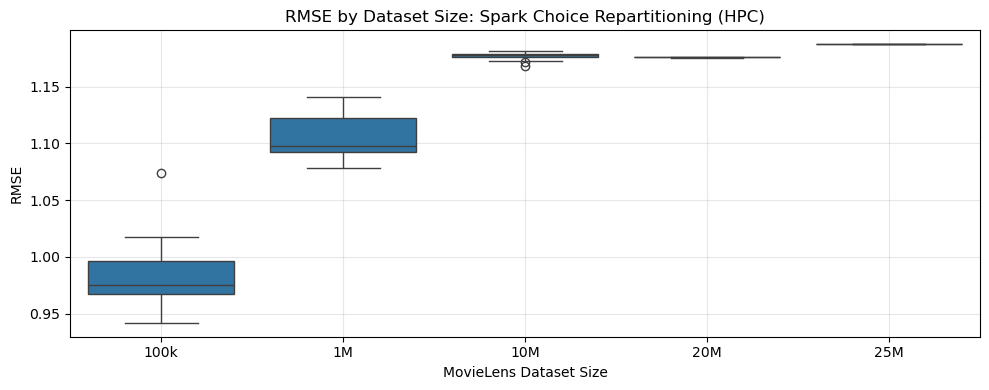

In [45]:
df01 = resultsHPC[resultsHPC["repartitions"] == "spark_choice"]
order = ['100k', '1M', '10M', '20M', '25M']

df01['dataset'] = df01['input_file'].apply(lambda x: re.search(r'(\d+M|\d+k)', x).group(1))

plt.figure(figsize=(10, 4))
sns.boxplot(x='dataset', y='rmse', data=df01, order=order)
plt.xlabel('MovieLens Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE by Dataset Size: Spark Choice Repartitioning (HPC)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results_rmse_spark_choice_hpc.png')
plt.show()

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_9064/3116166834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df02['dataset'] = df02['input_file'].apply(lambda x: re.search(r'(\d+M|\d+k)', x).group(1))


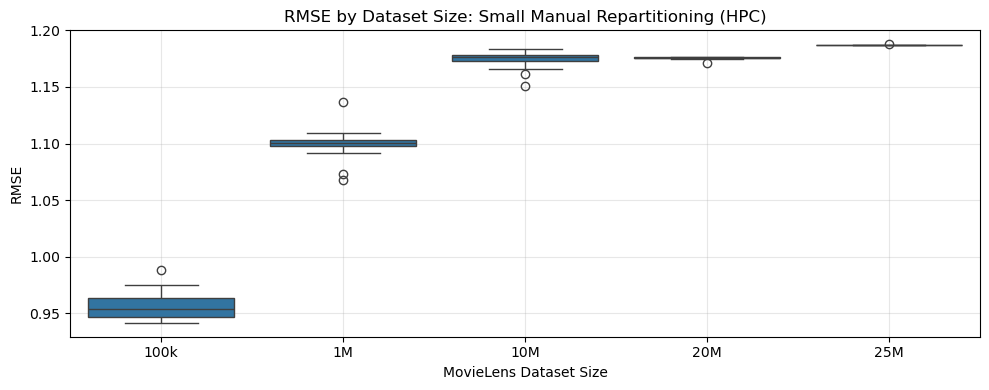

In [46]:
df02 = resultsHPC[resultsHPC["repartitions"] != "spark_choice"]
order = ['100k', '1M', '10M', '20M', '25M']

df02['dataset'] = df02['input_file'].apply(lambda x: re.search(r'(\d+M|\d+k)', x).group(1))

plt.figure(figsize=(10, 4))
sns.boxplot(x='dataset', y='rmse', data=df02, order=order)
plt.xlabel('MovieLens Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE by Dataset Size: Small Manual Repartitioning (HPC)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results_rmse_small_manual_repartitioning_hpc.png')
plt.show()